# Computer Vision Team 

## Mohamed Maher, Sara Saed, Hanan Mohamed

<br>

# Importing needed packages

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import display
from skimage.transform import resize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,models,layers
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

C:\Users\moahm\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br>

# Data preparation

In [2]:
# Define file location, each image path and its pet type for label
file_path = r"C:\Users\moahm\Desktop\NoteBook\GP\PetImages"
image_path, label = [], []

# itterating in file to get image from cat and dog files
for file in os.listdir(file_path):
    for path in os.listdir(file_path + "\\" + file):
        # if image in cat file refer it to 0 otherwize refer it to 1 for dog
        if file == 'Cat':
            label.append(0)
        else:
            label.append(1)
        image_path.append(os.path.join(file_path, file, path))

In [3]:
# Create dataframe for image path and label
df = pd.DataFrame({"Image_path": image_path,"Label": label})
df.head()

,Image_path,Label
0,C:\Users\moahm\Desktop\NoteBook\GP\PetImages\C...,0
1,C:\Users\moahm\Desktop\NoteBook\GP\PetImages\C...,0
2,C:\Users\moahm\Desktop\NoteBook\GP\PetImages\C...,0
3,C:\Users\moahm\Desktop\NoteBook\GP\PetImages\C...,0
4,C:\Users\moahm\Desktop\NoteBook\GP\PetImages\C...,0


<br>

# Data Cleaning

## Checking for Null Values

In [4]:
# Search if there is any null value
df.isna().sum()

Image_path    0
Label         0
dtype: int64

The data doesn't have any null value 

## Checking for duplicated data

In [5]:
# Search if there is any duplicated data
dup_df = df[df.duplicated()]
dup_df

,Image_path,Label


The data doesn't have any duplicated data

## Checking all files

In [6]:
# Serch in path if there is file not related to image with .jpg
count = 0
for file in df['Image_path']:
    if '.jpg' not in file:
        count += 1

print(f"Number of files without '.jpg': {count}")

Number of files without '.jpg': 0


All data are images and don't have any null values or duplicated data 

Now, the data is suitable for exploration 

 <br>

# Data Exploration

In [7]:
# Provide the shape of types in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  24998 non-null  object
 1   Label       24998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


In [8]:
# Provide summary statistics for numerical columns
df.describe()

,Label
count,24998.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Count Number of Pet Type

In [9]:
# Count number of cats(0) and dogs(1)
df['Label'].value_counts()

0    12499
1    12499
Name: Label, dtype: int64

The data contains 12499 images for cats and 12499 images for dogs.

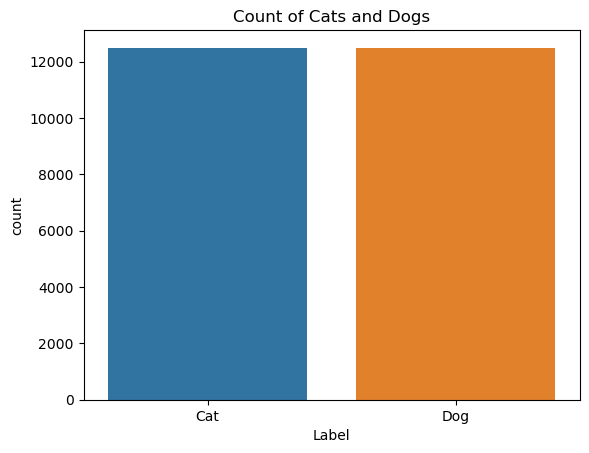

In [10]:
# Create count plot
plot = sns.countplot(data = df, x = 'Label')

# Set the title for plot
plot.set_title('Count of Cats and Dogs')

# Change the x-axis labels directly in the plot
plot.set_xticklabels(['Cat', 'Dog'])

# Display the plot
plt.show()

## Examples from data

This code get random image from dataset for cat

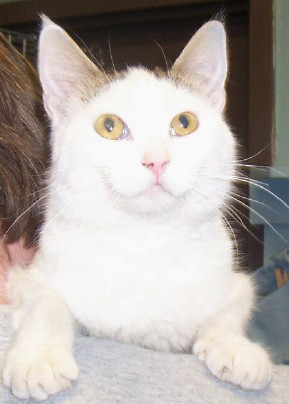

In [11]:
# Define the condition for cats (0) in label column
con_cat = 0

# Filter the dataframe based on the condition
filtered_df = df[df['Label'] == con_cat]

if not filtered_df.empty:
    # Randomly choose a file path from the filtered dataframe
    chosen_file = random.choice(filtered_df['Image_path'].tolist())
    
    # Open the image by path for chosen file 
    img = Image.open(mode='r', fp=str(chosen_file))
    
    # Display the image
    display(img)

<br>

This code get random image from dataset for dog

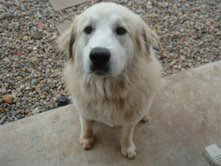

In [12]:
# Define the condition for dogs (1) in label column
con_dog = 1

# Filter the dataframe based on the condition
filtered_df = df[df['Label'] == con_dog]

if not filtered_df.empty:
    # Randomly choose a file path from the filtered dataframe
    chosen_file = random.choice(filtered_df['Image_path'].tolist())
    
    # Open the image by path for chosen file 
    img = Image.open(mode='r', fp=str(chosen_file))
    
    # Display the image
    display(img)

<br>

# Data Preprocessing

The file path defines the storage location for the dataset, which is then processed using ImageDataGenerator for real-time data augmentation. The dataset is divided into training and validation subsets, with the training dataset used for 80% and the validation dataset used for 20%. This setup efficiently loads, preprocesses, and augments the dataset.

In [13]:
# The path of the dataset
file_path = r"C:\Users\moahm\Desktop\NoteBook\GP\PetImages"

<br>

In [14]:
# Creating an instance of ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Create an instance of ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

<br>

In [15]:
# Training data generator
# This will load images from the directory, apply the transformations, and prepare them in batches for training
train_gen = train_datagen.flow_from_directory(
    file_path,
    target_size=(128, 128),
    batch_size=256,
    class_mode='binary',
    subset='training')


# Validation data generator
# This will load images from the directory, apply the transformations, and prepare them in batches for validation
validation_gen = train_datagen.flow_from_directory(
    file_path,
    target_size=(128, 128),
    batch_size=256,
    class_mode='binary',
    subset='validation')

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


The training and validation data generators found 20,000 and 4,998 images, respectively, in the specified directory, 80% and 20% of the dataset, respectively, to ensure accuracy and avoid bias.

<br>

# Modeling

The CNN model is designed for image classification, consisting of an input layer, five convolutional layers, five max-pooling layers, a flatten layer, a dense layer with 512 neurons, a dropout layer, and an output layer with a sigmoid activation function for binary classification.

In [16]:
# Building the CNN model with Dropout
model = Sequential([
    
    # Input layer
    Input(shape=(128, 128, 3)),
    
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    # First MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    # Second MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    # Third MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth convolutional layer
    Conv2D(256, (3, 3), activation='relu'),
    # Fourth MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Fifth convolutional layer
    Conv2D(512, (3, 3), activation='relu'),
    # Fifht MaxPooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten Layer
    Flatten(),
    
    # Dense layer
    Dense(512, activation='relu'),
    
    # Dropout layer
    Dropout(0.5),
    
    # Output Layer
    Dense(1, activation='sigmoid')
])

C:\Users\moahm\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# This code used to get a detailed summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

The model consists of five convolutional layers, five MaxPooling layers, a flatten layer, two dense layers, a Dropout layer, and an output layer. It uses 2,618,177 trainable parameters, making it suitable for tasks like image classification, where overfitting is managed through dropout, and feature extraction is accomplished through multiple convolutional layers.

<br>

# Training

The train consists of three parts: compiling the model, training it, and evaluating it. Compiling the model specifies the loss function (binary_crossentropy) and optimizer (adam) for binary classification problems. Training the model on the provided training data for 20 epochs and evaluating it on the validation data helps adjust weights and monitor performance. Finally, evaluating the model on the validation data provides final loss and accuracy metrics to understand its generalization to new data.

In [18]:
# Compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

<br>

In [19]:
# Training the model
history = model.fit(
    train_gen,
    validation_data=validation_gen,
    epochs=10)

Epoch 1/10


C:\Users\moahm\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/79 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5064 - loss: 0.6970

C:\Users\moahm\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5075 - loss: 0.6961 - val_accuracy: 0.5542 - val_loss: 0.6852
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5749 - loss: 0.6735 - val_accuracy: 0.6477 - val_loss: 0.6179
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6799 - loss: 0.5974 - val_accuracy: 0.6477 - val_loss: 0.6499
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7409 - loss: 0.5270 - val_accuracy: 0.7807 - val_loss: 0.4545
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7839 - loss: 0.4562 - val_accuracy: 0.7995 - val_loss: 0.4496
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8077 - loss: 0.4156 - val_accuracy: 0.8221 - val_loss: 0.4028
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8350 - loss: 0.3734 - val_accuracy: 0.8387 - val_loss: 0.3571
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.8509 - loss: 0.3405 - val_accuracy: 0.8473 - val_loss: 0.

<br>

In [22]:
# Evaluating the model
model.evaluate(validation_gen)

20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8714 - loss: 0.2883


[0.2803305685520172, 0.8739495873451233]

The model was trained for 10 epochs, showing consistent improvement in both training and validation accuracy across epochs.<br> Starting with an accuracy of 64.00% and a validation accuracy of 71.05% in the first epoch, the model achieved 90.26% accuracy with a validation accuracy of 89.26% by the tenth epoch. The loss also steadily decreased, starting at 0.6264 (training) and 0.5587 (validation) and dropping to 0.2324 (training) and 0.2478 (validation).<br> The final evaluation on the validation set yielded an accuracy of 89.57% and a loss of 0.2476, indicating strong model performance with good generalization capabilities.

<br>

# Results

The code retrieves training and validation accuracy and loss from the history object, creating a DataFrame called history_frame. It plots the training and validation loss over the epochs, allowing visualization of the model's loss changes during training and the evolution of the model's accuracy over time.

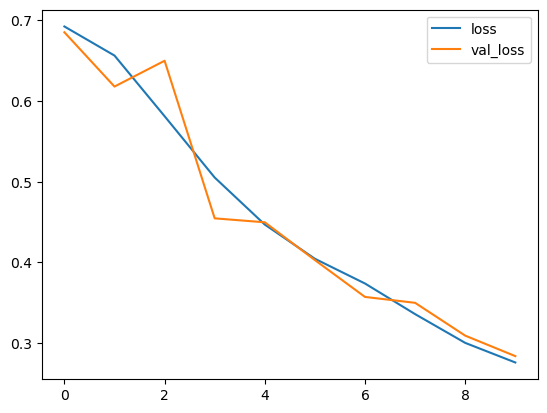

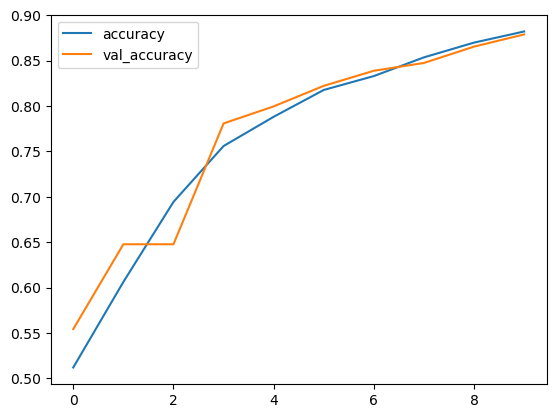

In [23]:
# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

summary of graph:

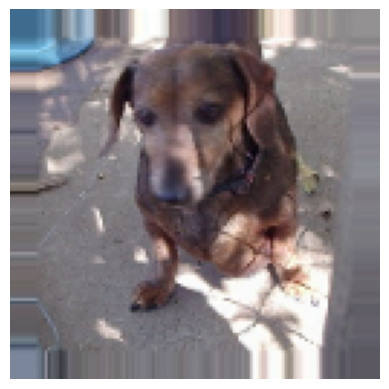

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: Dog (Confidence: 0.99)


In [35]:
idx2 = random.randint(0, len(validation_gen) - 1)

# Retrieve the corresponding image and label from the validation generator
x_batch, y_batch = validation_gen[idx2]  # Get the batch of images and labels
image = x_batch[0]  # Get the first image in the batch
true_label = y_batch[0]  # Get the true label for the image

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Predict using the model for the selected image
image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 128, 128, 3)
y_pred = model.predict(image)

predicted_value = y_pred[0][0]

# Print the prediction
predicted_label = 'Dog' if y_pred[0] >= 0.5 else 'Cat'
print(f"Prediction: {predicted_label} (Confidence: {predicted_value:.2f})")